# Example 2

## 3D case

**Content**

This notebook reproduces the first example of the paper. It consists of four main subheadings;

- Importing the *hcpinnseikonal* package functions
- Define the arguments for the input parameters
- Setup the medium and compute the data
- Training and inference

**Saving directory**

The notebook utilized [*wandb*](https://wandb.ai) for keeping track of the parameters and experiments. You can uncomment the *wandb* call to turn this feature off. Accordingly you need to specify the folder to save your experiment by changing the related *wandb* line inside the main function below.

## 3D Plotting

In [ ]:
import pyvista as pv
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.download_bunny()
mesh.flip_normals()

pl = pv.Plotter()
pl.add_mesh(mesh, color='lightgrey')
pl.background_color = 'white'
pl.camera_position = 'xy'

pl.show(jupyter_backend='pythreejs')

# widget = pl.show(jupyter_backend='pythreejs', return_viewer=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

values = np.linspace(0, 10, 1000).reshape((20, 5, 10))

# Create the spatial reference
grid = pv.UniformGrid()

# Set the grid dimensions: shape + 1 because we want to inject our values on
#   the CELL data
grid.dimensions = np.array(values.shape) + 1

# Edit the spatial reference
grid.origin = (100, 33, 55.6)  # The bottom left corner of the data set
grid.spacing = (1, 5, 2)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.cell_data["values"] = values.flatten(order="F")  # Flatten the array!

cmap = plt.cm.get_cmap("viridis", 4)

# Now plot the grid!
grid.plot(show_edges=True, cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.load_channels()
cmap = plt.cm.get_cmap("viridis", 4)

mesh.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

In [ ]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

from pyvista import examples

mesh = examples.load_channels()
cmap = plt.cm.get_cmap("viridis", 4)

slices = mesh.slice_orthogonal(x=20, y=20, z=30)
slices.plot(cmap=cmap, jupyter_backend='pythreejs', background='white', show_axes=True)

## Import *hcpinnseikonal* package functions

In [1]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from argparse import ArgumentParser   
from scipy import interpolate

from hcpinnseikonal.utils import *
from hcpinnseikonal.model import *
from hcpinnseikonal.train3d import *
from hcpinnseikonal.plot import *
from hcpinnseikonal.arguments import *

args = parser.parse_args([])

args.use_wandb='n'

dict_args = vars(args)
print(dict_args)

# Change these lines for the wandb setup
if args.use_wandb=='y':
    wandb.init(project=args.project_name)
    wandb.run.log_code(".")
    wandb_dir = wandb.run.dir
else:
    args.save_folder='../saves/saves_aridHalfNN3d'
    from pathlib import Path
    Path(args.save_folder).mkdir(parents=True, exist_ok=True)
    wandb_dir = args.save_folder

{'lateral_spacing': 0.01, 'vertical_spacing': 0.01, 'max_offset': 5.0, 'max_depth': 1.0, 'rec_spacing': 10, 'sou_spacing': 10, 'num_epochs': 250, 'num_neurons': 20, 'num_layers': 10, 'learning_rate': 0.001, 'model_type': 'seam', 'data_type': 'full', 'middle_shot': 'n', 'until_cmb': 'n', 'earth_scale': 'n', 'scale_factor': 10, 'reduce_after': 15, 'seed': 123, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'n', 'depth_shift': 'n', 'tau_multiplier': 3.0, 'initial_velocity': 4, 'zid_source': 5, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 3, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'n', 'xid_well': 5, 'last_vmultiplier': 5, 'nu_units': 'unitless', 'well_depth': None, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'n', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 1.0, 'event_factor': 1.0, 'checker_size': 5.0, 'tau_act': 'None', 'empty_middle': 'n', 'factoriz

## Define arguments

In [2]:
args.scale_factor=2 
args.until_cmb='y' 
args.num_epochs=1000
args.seed=1234 
args.learning_rate=5e-4
args.rescale_plot='n' 
args.initial_velocity=3 
args.zid_source=1 
args.zid_receiver=0 
args.data_type='nn' 
args.irregular_grid='y' 
args.num_layers=12 
args.model_type='arid' 
args.v_multiplier=6 
args.factorization_type='additive' 
args.tau_act='tanh' 
args.tau_multiplier=1 
args.max_offset=4.9875
args.max_depth=1.5 #1.865625 
args.vertical_spacing=0.009375 
args.lateral_spacing=0.0375
args.num_neurons=24 
args.causality_factor=.5 

args.causality_weight='type_0' 
args.reduce_after=50 
args.field_synthetic='n' 
args.event_factor=0.9 
args.station_factor=0.2 
args.residual_network='y' 
args.empty_middle='n' 
args.regular_station='y' 
args.rec_spacing=15 
args.sou_spacing=10

args.sampling_rate=6

# args.num_layers=24
# args.num_neurons=48

args.data_layers=12
args.data_neurons=32

dict_args=vars(args)
print(dict_args)

{'lateral_spacing': 0.0375, 'vertical_spacing': 0.009375, 'max_offset': 4.9875, 'max_depth': 1.5, 'rec_spacing': 15, 'sou_spacing': 10, 'num_epochs': 1000, 'num_neurons': 24, 'num_layers': 12, 'learning_rate': 0.0005, 'model_type': 'arid', 'data_type': 'nn', 'middle_shot': 'n', 'until_cmb': 'y', 'earth_scale': 'n', 'scale_factor': 2, 'reduce_after': 50, 'seed': 1234, 'initialization': 'varianceScaling', 'plotting_factor': 1, 'rescale_plot': 'n', 'depth_shift': 'n', 'tau_multiplier': 1, 'initial_velocity': 3, 'zid_source': 1, 'zid_receiver': 0, 'explode_reflector': 'n', 'field_synthetic': 'n', 'v_multiplier': 6, 'activation': 'elu', 'num_points': 1.0, 'irregular_grid': 'y', 'xid_well': 5, 'last_vmultiplier': 5, 'nu_units': 'unitless', 'well_depth': None, 'exp_function': 'n', 'exp_factor': 1.0, 'exclude_topo': 'n', 'exclude_well': 'n', 'exclude_source': 'n', 'loss_function': 'mse', 'station_factor': 0.2, 'event_factor': 0.9, 'checker_size': 5.0, 'tau_act': 'tanh', 'empty_middle': 'n', 'f

## Medium setup and data interpolation

Cuda installed! Running on GPU!
Device: cuda:0 Quadro RTX 8000
Epoch: 50, Loss: 1.3497042824865832e-05
Epoch: 100, Loss: 4.649106338881527e-06
Epoch: 150, Loss: 3.22570742615166e-06
Epoch: 200, Loss: 3.4744374975811558e-06
Epoch: 250, Loss: 2.872406704617398e-06
Epoch: 300, Loss: 2.924479976711006e-06
Epoch: 350, Loss: 2.141351425813568e-06
Epoch: 400, Loss: 2.2416253541821935e-06
Epoch: 450, Loss: 1.9219659915673833e-06
Epoch: 500, Loss: 1.9326694478988836e-06
Epoch: 550, Loss: 1.4531669542205292e-06
Epoch: 600, Loss: 1.2927023212518068e-06
Epoch: 650, Loss: 2.3320154368589934e-06
Epoch: 700, Loss: 1.3145081360636716e-06
Epoch: 750, Loss: 1.5932644445066606e-06
Epoch: 800, Loss: 1.5132404409161275e-06
Epoch: 850, Loss: 1.9875953193131492e-06
Epoch: 900, Loss: 1.5630434078344961e-06
Epoch: 950, Loss: 1.0440361234496052e-06
Epoch: 1000, Loss: 1.4756595748844936e-06
Epoch: 1050, Loss: 9.861941239529298e-07
Epoch: 1100, Loss: 1.2576089328813025e-06
Epoch: 1150, Loss: 1.780343016212193e-06

/tmp/ipykernel_48897/2310852456.py:401: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  Td_pred = model(torch.FloatTensor(X_test).T)


Loading time: 0.51 minutes


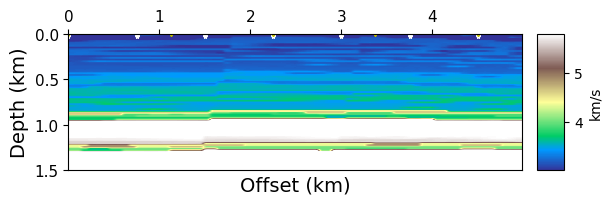

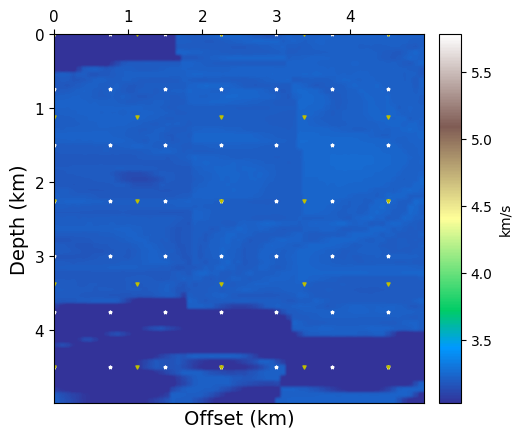

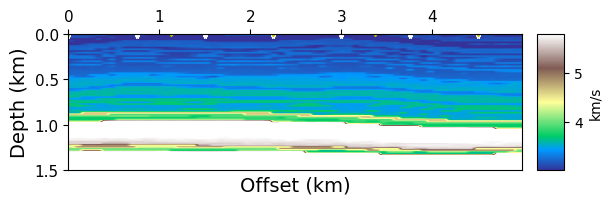

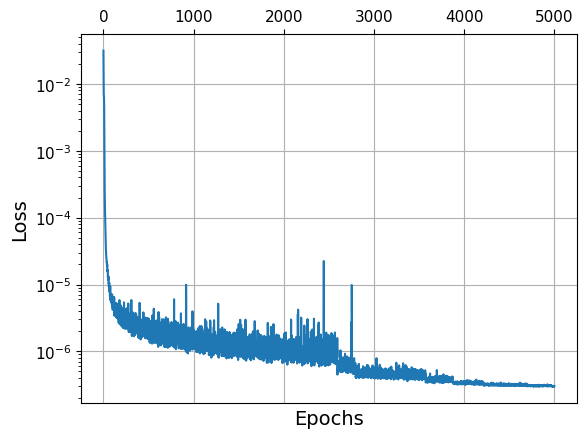

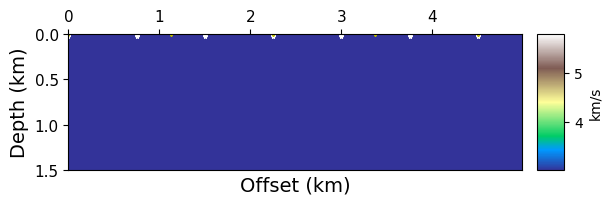

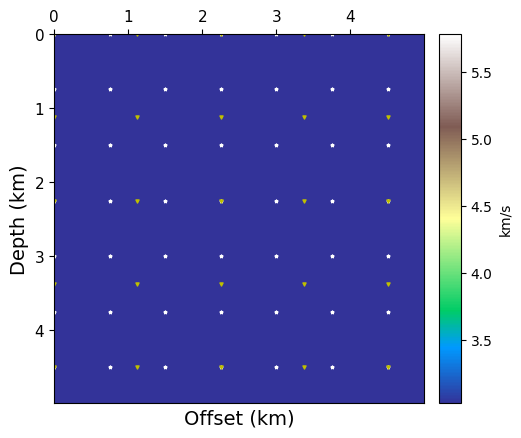

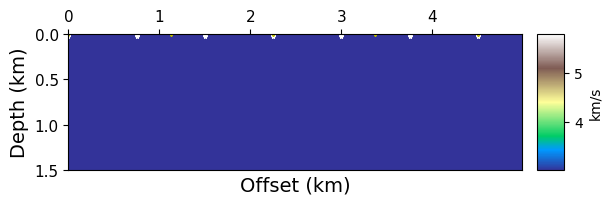

In [3]:
# Setup
if args.use_wandb=='y':
    wandb.config.update(args)

seed = args.seed

set_seed(seed)
device = set_device()

# Medium
data_type = args.data_type
deltar = args.rec_spacing
deltas = args.sou_spacing

# Computational model parameters
zmin = -0.1 if args.field_synthetic=='y' else 0; zmax = args.max_depth; #deltaz = args.vertical_spacing;
ymin = 0.; ymax = args.max_offset; #deltay = args.lateral_spacing;
xmin = 0.; xmax = args.max_offset; #deltax = args.lateral_spacing;
deltax, deltay, deltaz = args.sampling_rate*0.00625/2*4, args.sampling_rate*0.00625/2*4, args.sampling_rate*0.00625/2

if args.earth_scale=='y':
    earth_radi = 6371/args.scale_factor # Average in km
    xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax
    ymin, ymax, deltay = earth_radi*ymin, earth_radi*ymax, earth_radi*deltay
    zmin, zmax, deltaz = earth_radi*zmin, earth_radi*zmax, earth_radi*deltaz

# Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
z = np.arange(zmin,zmax,deltaz)
nz = z.size

y = np.arange(ymin,ymax,deltay)
ny = y.size

x = np.arange(xmin,xmax,deltax)
nx = x.size

Z,Y,X = np.meshgrid(z,y,x,indexing='ij')

# Number of training points
num_tr_pts = 4000 #int(args.num_points * nz * nx)

if args.field_synthetic=='y':
    import pandas as pd
    import pygmt
    import numpy as np

    import pandas as pd

    # Earthquake events location
    location = pd.read_csv('/home/taufikmh/KAUST/fall_2022/GFATT_PINNs/data/fang_etal_2020/sjfzcatlog.csv')

    # Recorded traveltime data
    traveltime = pd.read_table('/home/taufikmh/KAUST/fall_2022/GFATT_PINNs/data/fang_etal_2020/sjfz_traveltime.dat', delim_whitespace='y')

    # Rounding to make the coordinates rounding the same
    location, traveltime = location.round(3), traveltime.round(3)

    # Merge
    data = pd.merge(traveltime, location,  how='left', left_on=['evlat','evlon','evdep'], right_on = ['evlat','evlon','evdep'])

    # Create earthquake group
    data['event_id'] = data.groupby(['evlat', 'evlon', 'evdep']).cumcount() + 1
    data['station_id'] = data.groupby(['stlat', 'stlon', 'stele']).cumcount() + 1

    # Station only
    sta_only = data.drop_duplicates(subset=['stlat', 'stlon'], keep='last')

    # Event only
    eve_only = data.drop_duplicates(subset=['evlat', 'evlon'], keep='last')

    region = [-118, -115, 32.5, 34.50]
    x0,x1,y0,y1 = -117.45, -115.55, 34.15, 32.76

    # eve_only['dist_to_line'] = 
    p1=np.array([(360+x0)*np.ones_like(eve_only.event_id.values), y0*np.ones_like(eve_only.event_id.values)])
    p2=np.array([(360+x1)*np.ones_like(eve_only.event_id.values), y1*np.ones_like(eve_only.event_id.values)])
    p3=np.array([eve_only.evlon, eve_only.evlat])

    d = pd.DataFrame(np.cross((p2-p1).T,(p3-p1).T)/np.linalg.norm((p2-p1).T))
    eve_only.loc[:, 'closest_event'] = np.copy(d[0].values)

    # sta_only['dist_to_line'] = 
    p1=np.array([(360+x0)*np.ones_like(sta_only.station_id.values), y0*np.ones_like(sta_only.station_id.values)])
    p2=np.array([(360+x1)*np.ones_like(sta_only.station_id.values), y1*np.ones_like(sta_only.station_id.values)])
    p3=np.array([sta_only.stlon, sta_only.stlat])

    d = pd.DataFrame(np.cross((p2-p1).T,(p3-p1).T)/np.linalg.norm((p2-p1).T))
    sta_only.loc[:, 'closest_station'] = np.copy(d[0].values)

    closest_sta = sta_only[np.abs(sta_only['closest_station'])<0.003]
    closest_eve = eve_only[np.abs(eve_only['closest_event'])<0.00003]

    grid = pygmt.datasets.load_earth_relief(resolution="03m", region=region)

    points = pd.DataFrame(
        data=np.linspace(start=(x0, y0), stop=(x1, y1), num=len(x)),
        columns=["x", "y"],
    )

    track = pygmt.grdtrack(points=points, grid=grid, newcolname="elevation")
    xtop = track.x.values + 360
    ztop = track.elevation.values*1e-3

    xsta = closest_sta.stlon.values
    zsta = closest_sta.stele.values

    xeve = closest_eve.evlon.values
    zeve = closest_eve.evdep.values

    xtop,xsta,xeve = xtop-xtop.min(),xsta-xsta.min(),xeve-xeve.min()
    xtop,xsta,xeve = xtop/xtop.max()*xmax,xsta/xsta.max()*xmax,xeve/xeve.max()*xmax
    
    ytop,ysta,yeve = ytop-ytop.min(),ysta-ysta.min(),yeve-yeve.min()
    ytop,ysta,yeve = ytop/ytop.max()*ymax,ysta/ysta.max()*ymax,yeve/yeve.max()*ymax

    ztop,zsta,zeve = ztop-ztop.min(),zsta-zsta.min(),zeve-zeve.min()
    ztop,zsta,zeve = args.station_factor*ztop/ztop.max()+zmin,args.station_factor*zsta/zsta.max()+zmin,zmax-args.event_factor*zeve/zeve.max()

    xsta,xeve = xsta[(xsta>xtop.min()) & (xsta<xtop.max())], xeve[(xeve>xtop.min()) & (xeve<xtop.max())]
    ysta,yeve = ysta[(ysta>ytop.min()) & (ysta<ytop.max())], yeve[(yeve>ytop.min()) & (yeve<ytop.max())]
    zsta,zeve = zsta[(xsta>xtop.min()) & (xsta<xtop.max())],zeve[(xeve>xtop.min()) & (xeve<xtop.max())]

    if args.exclude_topo=='y':
        ztop, zsta = zmin*np.ones_like(ztop), zmin*np.ones_like(zsta)

    ztop, zsta = zmin-ztop, zmin-zsta

    id_sou_z = np.array([]).astype(int)

    for szi in zeve.round(2):
        sid = np.where(np.abs(z.round(3)-szi)<1e-6)
        id_sou_z = np.append(id_sou_z,sid)

    id_rec_z = np.array([]).astype(int)

    for rzi in zsta.round(2):
        sid = np.where(np.abs(z.round(3)-rzi)<1e-6)
        id_rec_z = np.append(id_rec_z,sid)

    id_sou_y = np.array([]).astype(int)

    for syi in yeve.round(2):
        sid = np.where(np.abs(y.round(3)-syi)<1.5e-2)
        id_sou_y = np.append(id_sou_y,sid)

    id_rec_y = np.array([]).astype(int)

    for ryi in ysta.round(2):
        sid = np.where(np.abs(y.round(3)-ryi)<1.5e-2)
        id_rec_y = np.append(id_rec_y,sid)
        
    id_sou_x = np.array([]).astype(int)

    for sxi in xeve.round(2):
        sid = np.where(np.abs(x.round(3)-sxi)<1.5e-2)
        id_sou_x = np.append(id_sou_x,sid)

    id_rec_x = np.array([]).astype(int)

    for rxi in xsta.round(2):
        sid = np.where(np.abs(x.round(3)-rxi)<1.5e-2)
        id_rec_x = np.append(id_rec_x,sid)

    id_top_x = []
    id_top_y = []
    id_top_z = []

    for h in range(len(xtop)):

        for i in range(len(x)):
            if np.abs(xtop[h]-x[i])<1e-2:
                id_top_x.append(i)
                
        for i in range(len(y)):
            if np.abs(ytop[h]-y[i])<1e-2:
                id_top_y.append(i)

        for j in range(len(z)):    
            if np.abs(ztop[h]-z[j])<5e-3:
                id_top_z.append(j)

    if args.regular_station=='y':
        id_rec_x = id_top_x[::args.rec_spacing]
        id_rec_y = id_top_y[::args.rec_spacing]
        id_rec_z = id_top_z[::args.rec_spacing]

    if args.append_shot=='y':
        for i in range(8):
            id_sou_x = np.append(id_sou_x, len(x)-1-2*i)
            id_sou_y = np.append(id_sou_y, len(y)-1-2*i)
            id_sou_z = np.append(id_sou_z, len(z)-1-int(0.5*i))
            
    # plt.plot(args.plotting_factor*(xtop-xtop.min()), args.plotting_factor*ztop)
    # plt.scatter(args.plotting_factor*(xeve-xtop.min()), args.plotting_factor*zeve)
    # plt.scatter(x[id_rec_x], z[id_rec_z], c='y', marker='v')
    # plt.title('Cross-section')
    # plt.xlabel('X (km)')
    # plt.ylabel('Z (km)')
    # plt.gca().invert_yaxis()
    # plt.axis('tight')
    # plt.savefig(os.path.join(wandb_dir, 'cross_section.png'), format='png', bbox_inches="tight")
else:
    zeve, yeve, xeve = z[args.zid_source]*np.ones_like(x[::deltas]), y[::deltas], x[::deltas]
    zsta, ysta, xsta = z[args.zid_receiver]*np.ones_like(x[::deltar]), y[::deltar], x[::deltar]
    ztop, ytop, xtop = zmin*np.ones_like(x), np.copy(y), np.copy(x)

    idx_all = np.arange(X.size).reshape(X.shape)
    
    # Sources indices
    id_sou = idx_all[args.zid_source, ::deltas, ::deltas].reshape(-1)
    
    # Receivers indices
    id_rec = idx_all[args.zid_receiver, ::deltar, ::deltar].reshape(-1)

# Keeping the number of shots fixed while centering the shots location
if args.middle_shot=='y':
    id_sou_left = x.shape[0]//2-len(id_sou_x)//2
    id_sou_x = np.array(range(id_sou_left, id_sou_left+len(id_sou_x)))
    id_sou_y = np.array(range(id_sou_left, id_sou_left+len(id_sou_y)))

if args.explode_reflector=='y':
    id_sou_x = np.arange(0, len(x), args.sou_spacing)
    id_sou_y = np.arange(0, len(y), args.sou_spacing)
    id_sou_z = np.ones_like(id_sou_x)*(len(z)-1)

if args.empty_middle=='y':
    id_sou, id_rec = (np.array(id_sou_x)<=(len(x)//2-50))|(np.array(id_sou_x)>=(len(x)//2+50)), (np.array(id_rec_x)<=(len(x)//2-50))|(np.array(id_rec_x)>=(len(x)//2+50))
    if args.field_synthetic=='n':
        id_sou_x = np.array(id_sou_x)[id_sou]
        id_sou_y = np.array(id_sou_y)[id_sou]
        id_sou_z = np.array(id_sou_z)[id_sou]
    id_rec_x = np.array(id_rec_x)[id_rec]
    id_rec_y = np.array(id_rec_y)[id_rec]
    id_rec_z = np.array(id_rec_z)[id_rec]

sz = Z.reshape(-1)[id_sou]
sy = Y.reshape(-1)[id_sou]
sx = X.reshape(-1)[id_sou]

xri = np.tile(X.reshape(-1)[id_rec], len(id_sou))
yri = np.tile(Y.reshape(-1)[id_rec], len(id_sou))
zri = np.tile(Z.reshape(-1)[id_rec], len(id_sou))

xsi = np.repeat(sx, len(id_rec))
ysi = np.repeat(sy, len(id_rec))
zsi = np.repeat(sz, len(id_rec))

idi = np.repeat(np.arange(len(id_sou)), len(id_rec))

if args.field_synthetic=='y':
    X_test = [np.tile(x[id_top_x], len(sx)), np.tile(z[id_top_z], len(sz)), 
             np.repeat(x[id_sou_x], len(x[id_top_x])), 
             np.repeat(z[id_sou_z], len(z[id_top_z]))]
else:
    X_test = [np.tile(X[args.zid_receiver,:,:].reshape(-1), len(sx)), 
             np.tile(Y[args.zid_receiver,:,:].reshape(-1), len(sy)),
             np.tile(z[args.zid_receiver]*np.ones_like(X[args.zid_receiver,:,:].reshape(-1)), len(sz)), 
             np.repeat(sx, X[args.zid_receiver,:,:].size), 
             np.repeat(sy, X[args.zid_receiver,:,:].size), 
             np.repeat(sz, X[args.zid_receiver,:,:].size),] 

Z,Y,X,SX = np.meshgrid(z,y,x,sx,indexing='ij')
_,_,_,SY = np.meshgrid(z,y,x,sy,indexing='ij')
_,_,_,SZ = np.meshgrid(z,y,x,sz,indexing='ij')
_,_,_,ID = np.meshgrid(z,y,x,np.arange(sx.size),indexing='ij')

## Sources location checkpointing
# for i in range(len(id_sou)):
#     print(np.unique(SX[:,:,:,i]), np.unique(SY[:,:,:,i]), np.unique(SZ[:,:,:,i]))

if args.model_type=='marmousi':
    vel = np.fromfile('../data/marmousi.bin', np.float32).reshape(221, 601)
    x1 = np.linspace(0, 5, 601)
    z1 = np.linspace(0, 1, 221) 
    x2 = np.linspace(0.25, 5, len(x))
    z2 = np.linspace(0.09, 0.55, len(z)) 
    f = interpolate.interp2d(x1, z1, vel, kind='cubic')
    vel = f(x2, z2)
    # Augment a 3D velocity volume from 2D data
    vel3d = np.repeat(vel[:, np.newaxis, :], len(y), axis=1)
elif args.model_type=='seam':
    vel = np.load('/home/taufikmh/KAUST/spring_2022/constrained_eikonal/notebooks/PINNtomo/inputs/seam_model/vel_seam.npy')
    x1 = np.arange(0,1+0.01,0.01)
    z1 = np.arange(0,1+0.01,0.01)
    from scipy import interpolate
    f = interpolate.interp2d(x1, z1, vel, kind='cubic')
    vel = f(x, z)
    # Augment a 3D velocity volume from 2D data
    vel3d = np.repeat(vel[:, np.newaxis, :], len(y), axis=1)
elif args.model_type=='constant':
    vel = 4*np.ones((nz,nx))
elif args.model_type=='gradient':
    vel = 1 + 7*np.meshgrid(x,z)[1]
elif args.model_type=='arid':
    vel = np.fromfile('../data/seam_arid', np.float32).reshape(400,400,600)/1000
    vel3d = np.moveaxis(vel[::args.sampling_rate,::args.sampling_rate,::args.sampling_rate], -1, 0)[20:,:,:]
    
# Extending the velocity model in thirs dimension byy repeatin the array
velmodel = np.repeat(vel3d[...,np.newaxis], sx.size,axis=2)

if args.depth_shift=='y':
    zmin, zmax, z, sz, Z, SZ = zmin+5, zmax+5, z+5, sz+5, Z+5, SZ+5

X_star = [Z.reshape(-1,1), Y.reshape(-1,1), X.reshape(-1,1), SY.reshape(-1,1), SX.reshape(-1,1)] # Grid points for prediction 

# Numerical traveltime
T_data3d = numerical_traveltime3d(vel3d, len(x), len(y), len(z), len(id_sou), 
                                  xmin, ymin, zmin, deltax, deltay, deltaz, 
                                  [np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))], 
                                  [np.where(y==Y[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))], 
                                  [np.where(z==Z[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))])

# ZX plane after
plot_section(vel3d[:,10,:], 'v_true_zx.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# XY plane
plot_section(vel3d[5,:,:], 'v_true_xy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec])

# ZY plane
plot_section(vel3d[:,:,10], 'v_true_zy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=Y[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# Plots
if args.model_type=='checkerboard':
    plot_section((6 + 6.5217391304347826*Z[:,:,0])/args.scale_factor, "v_back.png", 
                 save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z])
    plot_section(velpert[:,:,0]/args.scale_factor, "v_pert.png", 
                 save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z])

# Interpolation
Td_nn = np.zeros_like(T_data3d)
taudx_nn = np.zeros_like(T_data3d)

Ti_data = np.zeros((len(id_rec)*len(id_sou)))

for i in range(len(id_sou)):
    Ti_data[i*len(id_rec):(i+1)*len(id_rec)] = T_data3d[:,:,:,i].reshape(-1)[id_rec]
    
rand_idx = np.random.permutation(np.arange(len(Ti_data)))

X_ori = np.vstack((xri, yri, zri, xsi, ysi, zsi)).T
y_ori = Ti_data

X_all = X_ori[rand_idx,:]
y_all = y_ori[rand_idx]

X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

X_ori = torch.from_numpy(X_ori).float()

all_dataset = torch.utils.data.TensorDataset(X_all, y_all)

# Use Pytorch's functionality to load data in batches. Here we use full-batch training again.
all_loader = torch.utils.data.DataLoader(all_dataset, batch_size=16, shuffle=True)

if data_type=='nn':
    torch.manual_seed(8888)
    model = FullyConnectedNetwork(6, 1, n_hidden=[args.data_neurons]*args.data_layers, act='relu')
    # model = ResidualNetwork(4, 1, num_neurons=args.data_neurons, num_layers=args.data_layers, act=args.activation, lay='linear')
    # optimizer = torch.optim.Adam(model.parameters(), lr=5e-4) # best
    optimizer = torch.optim.Adam(model.parameters(), lr=2e-4)
    # scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=int(5*args.reduce_after), verbose=True)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=int(4*args.reduce_after), verbose=True)
    criterion = torch.nn.MSELoss()
    model.train()
    loss_data = []
    for epoch in range(int(5e3)):
        total_loss = 0.
        model.train()
        loss = 0
        for x_i, y_i in all_loader:
            optimizer.zero_grad()
            yest = model(x_i).view(-1)
            loss = criterion(yest, y_i)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if epoch % 50 == 0 and epoch > 0:
            print(f'Epoch: {epoch}, Loss: {total_loss / X_all[:,0].detach().numpy().size}')
        mean_loss = total_loss / X_all[:,0].detach().numpy().size
        # wandb.log({"data_loss": mean_loss})
        scheduler.step(mean_loss)
        loss_data.append(mean_loss)

    Td_nn = np.zeros_like(T_data3d)

    model.eval()
    Td_pred = model(torch.FloatTensor(X_test).T)

    for i in range(len(id_sou)):
        Td_nn[:,:,:,i] = Td_pred[i*len(x)**2:(i+1)*len(x)**2].detach().numpy().reshape(len(x),-1)

    # Convergence history plot for verification
    fig = plt.figure()
    ax = plt.axes()
    ax.semilogy(loss_data)

    ax.set_xlabel('Epochs',fontsize=14)

    plt.xticks(fontsize=11)

    ax.set_ylabel('Loss',fontsize=14)
    plt.yticks(fontsize=11);
    plt.grid()
    plt.savefig(os.path.join(wandb_dir, "data_loss.png"), format='png', bbox_inches="tight")

    # Save model
    torch.save({
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_data
    }, wandb_dir+'/saved_data_model')

# Analytical solution for the known traveltime part
if args.depth_shift=='y':
    vs = args.initial_velocity #velmodel[np.round((SZ-5)/deltaz).astype(int),np.round(SX/deltax).astype(int),0]
else:
    vs = 1 #vel3d[np.round(SZ/deltaz).astype(int),np.round(SY/deltay).astype(int),np.round(SX/deltax).astype(int)]

T0 = np.sqrt((Z-SZ)**2 + (Y-SY)**2 + (X-SX)**2)/vs;
px0 = np.divide(X-SX, T0*vs**2, out=np.zeros_like(T0), where=T0!=0)
py0 = np.divide(Y-SY, T0*vs**2, out=np.zeros_like(T0), where=T0!=0)
pz0 = np.divide(Z-SZ, T0*vs**2, out=np.zeros_like(T0), where=T0!=0)

if args.field_synthetic=='y':
    xf = np.arange(xmin,xmax+0.1*deltax,0.1*deltax)
    zf = np.arange(zmin,zmax+0.1*deltaz,0.1*deltaz)
    T_topo = np.zeros((len(zf), len(xf), len(id_sou_x)))
    for i in range(len(id_sou_x)):
        f = interpolate.interp2d(x, z, T_data3d[:,:,i], kind='cubic')
        T_topo[:,:,i] = f(xf, zf)
    id_top_x = []
    id_top_z = []

    for h in range(len(xtop)):

        for i in range(len(x)):
            if np.abs(xtop[h]-x[i])<1e-2:
                id_top_x.append(i)

        for j in range(len(z)):    
            if np.abs(ztop[h]-z[j])<5e-3:
                id_top_z.append(j)

    taud_topo = np.divide(T_data3d, T0, where=T0!=0)[id_top_z, id_top_x, :]
    T_topo = T_data[id_top_z, id_top_x, :]

    taud_topo = np.repeat(taud_topo, nz).reshape(nx,len(id_sou_x),nz).swapaxes(1,2).swapaxes(0,1)
    T_topo = np.repeat(T_topo, nz).reshape(nx,len(id_sou_x),nz).swapaxes(1,2).swapaxes(0,1)

Td_hc = np.zeros_like(T0)
T0_hc = np.zeros_like(T0)
taud_hc = np.zeros_like(T0)
taudx_hc = np.zeros_like(T0)
taudy_hc = np.zeros_like(T0)

for i in range(len(id_sou)):
    T0_hc[:,:,:,i] = np.moveaxis(np.tile(T0.reshape(X.shape)[args.zid_receiver,:,:,i], nz).reshape(ny,nz,nx), 1, 0)
    # np.tile(T0[args.zid_receiver,:,:,i], nz).reshape(nz,ny,nx)

    # Numerical
    if data_type=='full':
        Td_hc[:,:,:,i] = np.moveaxis(np.tile(T_data3d[args.zid_receiver,:,:,i], nz).reshape(ny,nz,nx), 1, 0)
    # np.tile(T_data3d[args.zid_receiver,:,:,i], nz).reshape(nz,ny,nx)

    # NN-based interpolation
    elif data_type=='nn':
        Td_hc[:,:,:,i] = Td_nn[:,:,:,i].reshape(nz,ny,nx)

    if args.factorization_type=='multiplicative':   
        taud_hc[:,:,:,i] = np.divide(Td_hc[:,:,:,i], T0_hc[:,:,:,i], out=np.ones_like(T0_hc[:,:,:,i]),
                                   where=T0_hc[:,:,:,i]!=0)
    else:
        taud_hc[:,:,:,i] = Td_hc[:,:,:,i] - T0_hc[:,:,:,i]

    # Numerical
    if data_type=='full':
        taudy_hc[:,:,:,i] = np.gradient(taud_hc.reshape(X.shape)[:,:,:,i], deltay, axis=1)
        taudx_hc[:,:,:,i] = np.gradient(taud_hc.reshape(X.shape)[:,:,:,i], deltax, axis=2)

    # NN-based interpolation
    elif data_type=='nn':
        taudy_hc[:,:,:,i] = np.gradient(taud_hc.reshape(X.shape)[:,:,:,i], deltay, axis=1)        
        taudx_hc[:,:,:,i] = np.gradient(taud_hc.reshape(X.shape)[:,:,:,i], deltax, axis=2)

if args.field_synthetic=='y':

    NAN = np.ones_like(X)
    for i in range(z.shape[0]):
        for j in range(x.shape[0]):
            if z[i] < Z[id_top_z, id_top_x, 0][j]:
                NAN[i,j,:] = float("Nan")
                
# # Interpolation check            
# plot_int = len(id_sou)//5 if len(id_sou)>=5 else 1
# for i in range(0, len(id_sou), plot_int):
#     plt.figure()
#     plt.scatter(x[id_rec_x], T_data[id_rec_z,id_rec_x,i], label='Data')
#     plt.scatter(x[id_rec_x], Td_hc[id_rec_z,id_rec_x,i], label='Interpolated')
#     plt.legend(['Data', 'Interpolation'])
#     plt.savefig(os.path.join(wandb_dir, "interpolation.png"), format='png', bbox_inches="tight")

# Locate source boolean
import time
start_time = time.time()

sids = id_sou

# Locate source boolean
isource = np.ones_like(X_star[0]).reshape(-1,).astype(bool)
isource[sids] = False

velmodel = vel3d.reshape(-1,1)
px0 = px0.reshape(-1,1)
py0 = py0.reshape(-1,1)
pz0 = pz0.reshape(-1,1)
T0 = T0.reshape(-1,1)
if data_type!='nn':
    T_data = T_data3d.reshape(-1,1)
else:
    T_data = Td_nn.reshape(-1,1)
taud = taud_hc.reshape(-1,1)

if args.factorization_type=='multiplicative':
    taud[~isource] = 1.    
taudx = taudx_hc.reshape(-1,1)
taudy = taudy_hc.reshape(-1,1)
index = ID.reshape(-1,1)

perm_id = np.random.permutation(X.size-sx.size)

input_wsrc = [X, Y, Z, SX, SY, SZ, taud, taudx, taudy, T0, px0, py0, pz0, index]
input_wosrc = [i.ravel()[isource.reshape(-1)][perm_id] for i in input_wsrc]
if args.field_synthetic=='y':
    input_wonan = [i.ravel()[~np.isnan(NAN.ravel()[isource.reshape(-1)][perm_id])] for i in input_wosrc]

# Network
lay = 'linear'
ini = args.initialization
bias = 0.2
mean = 0.01
std = 0.05
opttype = 'adam'
lr = args.learning_rate

torch.manual_seed(seed)
if args.residual_network=='n':
    tau_model = FullyConnectedNetwork(4, 1, [args.num_neurons]*args.num_layers, last_act=args.tau_act, act=args.activation, lay=lay, last_multiplier=args.tau_multiplier)
else:
    tau_model = ResidualNetwork(4, 1, num_neurons=args.num_neurons, num_layers=args.num_layers, act=args.activation, lay=lay, last_multiplier=args.tau_multiplier)
tau_model.to(device)

torch.manual_seed(seed)
if args.residual_network=='n':
    v_model = FullyConnectedNetwork(3, 1, [args.num_neurons//2]*args.num_layers, act=args.activation, lay=lay, last_act='relu', last_multiplier=args.v_multiplier)
else:
    v_model = ResidualNetwork(3, 1, num_neurons=args.num_neurons//2, act='relu', last_act='relu', num_layers=args.num_layers, lay=lay, last_multiplier=args.v_multiplier)
v_model.to(device)
v_model.apply(lambda m: init_weights(m, init_type=ini, bias=bias, mean=mean, std=std))

perc = args.num_points

if args.irregular_grid=='y':
    npoints = int(X.size * perc)
    ipermute = np.random.permutation(np.arange(X.size))[:npoints]
else:
    ipermute = None

# Compute traveltime with randomly initialized network
pde_loader, ic = create_dataloader3d([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=2048, fast_loader=True, perm_id=ipermute)

if args.exp_function=='y':
    rec_op = (1-np.exp((Z.reshape(X.shape)-z[args.zid_receiver])**args.exp_factor))
else:
    rec_op = Z.reshape(X.shape)

# if args.factorization_type=='multiplicative':
#     tau_true = np.divide(
#         T_data.reshape(X.shape), 
#         T0.reshape(X.shape), 
#         out=np.ones_like(T0.reshape(X.shape)), 
#         where=T0.reshape(X.shape)!=0
#     )
#     tau_true = tau_true - taud.reshape(X.shape)
#     tau_true = np.divide(
#         tau_true, 
#         rec_op, 
#         out=np.ones_like(Z.reshape(X.shape)), 
#         where=Z.reshape(X.shape)!=0
#     )
#     T_true = (rec_op*tau_true + taud.reshape(X.shape))*T0.reshape(X.shape)
# else:
#     tau_true = T_data.reshape(X.shape) - T0.reshape(X.shape) - taud.reshape(X.shape)
#     tau_true = np.divide(
#         tau_true, 
#         rec_op, 
#         out=np.ones_like(Z.reshape(X.shape)), 
#         where=Z.reshape(X.shape)!=0
#     )
#     T_true = rec_op*tau_true + taud.reshape(X.shape) + T0.reshape(X.shape)

v_init = evaluate_velocity3d(v_model, pde_loader, X.size, batch_size=2048, device=device)
tau_init = evaluate_tau3d(tau_model, pde_loader, X.size, batch_size=2048, device=device)

elapsed = time.time() - start_time
print('Loading time: %.2f minutes' %(elapsed/60.))

# Optimizer
if opttype == 'adam':
    optimizer = torch.optim.Adam(list(tau_model.parameters()) + list(v_model.parameters()), lr=lr, betas=(0.9, 0.999), eps=1e-5)
elif opttype == 'lbfgs':
    optimizer = torch.optim.LBFGS(list(tau_model.parameters()) + list(v_model.parameters()), line_search_fn="strong_wolfe")

# Scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=args.reduce_after, verbose=True)

v_init = v_init.detach().cpu().numpy().reshape(X.shape)

# ZX plane after
plot_section(v_init.reshape(X.shape)[:,10,:,0], 'v_init_zx.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# XY plane
plot_section(v_init.reshape(X.shape)[5,:,:,0], 'v_init_xy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou],rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec])

# ZY plane
plot_section(v_init.reshape(X.shape)[:,:,10,0], 'v_init_zy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou],rx=Y[:,:,:,0].reshape(-1)[id_rec],rz=Z[:,:,:,0].reshape(-1)[id_rec])

# if data_type!='full':
#     if args.field_synthetic=='y':
#         for i in range(0, len(id_sou_x), plot_int):
#             plot_horizontal(T_data.reshape(X.shape)[id_top_z,id_top_x,i], Td_nn[id_top_z,id_top_x,i], 
#                             x*args.plotting_factor,'Interpolation Comparison','T (s)',
#                             'T_comp_'+str(i)+'.png','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
#             plot_horizontal(smooth(np.gradient(T_data.reshape(X.shape)[id_top_z,id_top_x,i]),2,'blackman'), 
#                             np.gradient(Td_nn[id_top_z,id_top_x,i]), 
#                             x*args.plotting_factor,'Interpolation Comparison','dT/dx (s/km)',
#                             'Tdx_comp_'+str(i)+'.png','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
#     else:
#         for i in range(0, len(id_sou_x), plot_int):
#             plot_horizontal(T_data.reshape(X.shape)[0,:,i], Td_nn[0,:,i], 
#                             x*args.plotting_factor,'Interpolation Comparison','T (s)',
#                             'T_comp_'+str(i)+'.png','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)
#             plot_horizontal(smooth(np.gradient(T_data.reshape(X.shape)[0,:,i]),2,'blackman'), np.gradient(Td_nn[0,:,i]), 
#                             x*args.plotting_factor,'Interpolation Comparison','dT/dx (s/km)',
#                             'Tdx_comp_'+str(i)+'.png','True','NN', 
#                             save_dir=wandb_dir, id_rec_x=id_rec_x, id_rec_z=id_rec_z)

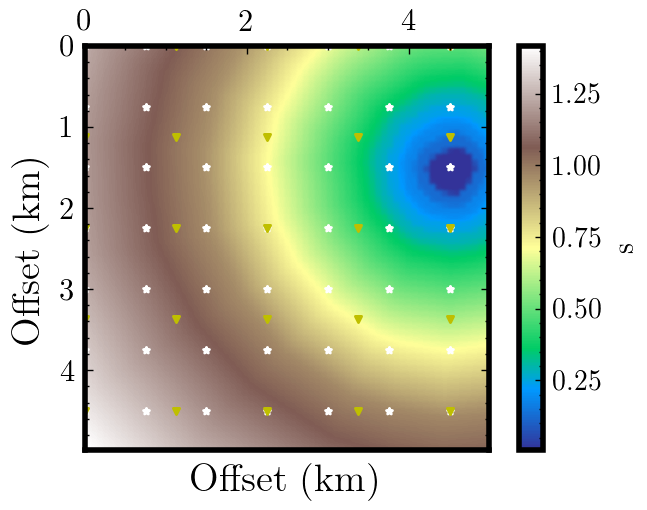

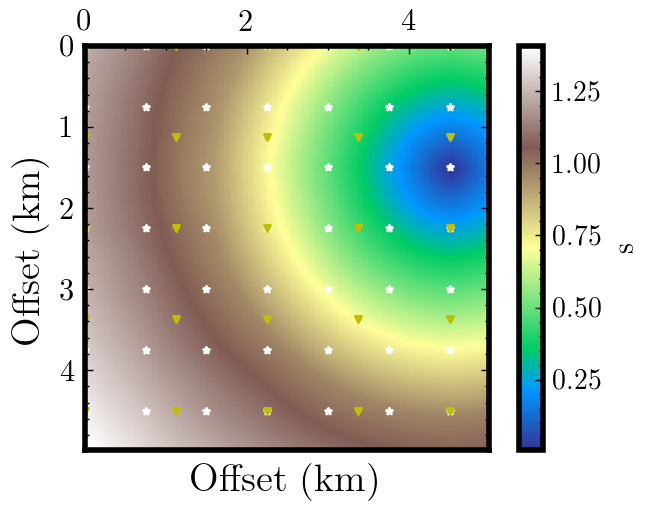

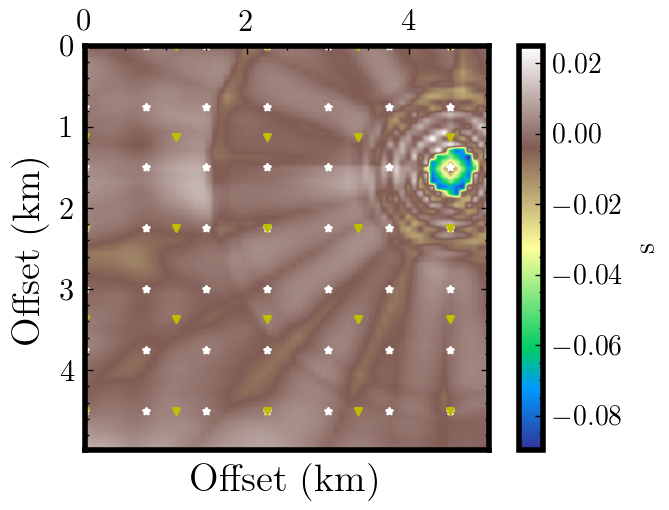

In [30]:
kk=20
# XY plane
plot_depth(Td_nn.reshape(X.shape)[args.zid_receiver,:,:,kk], 'Td_nn_xy_shot_'+str(kk)+'.png', 
           save_dir=wandb_dir, aspect='equal',
           xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
           rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec],
           sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou], data_type='s')

plot_depth(T_data3d.reshape(X.shape)[args.zid_receiver,:,:,kk], 'T_data_xy_shot_'+str(kk)+'.png', 
           save_dir=wandb_dir, aspect='equal',
           xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
           rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec],
           sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou], data_type='s')

plot_depth(Td_nn.reshape(X.shape)[args.zid_receiver,:,:,kk]-T_data3d.reshape(X.shape)[args.zid_receiver,:,:,kk], 'T_error_xy_shot_'+str(kk)+'.png', 
           save_dir=wandb_dir, aspect='equal',
           xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
           rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec],
           sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou], data_type='s')

### Visualize 3D model

In [ ]:
tmp_idsx = [np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]
tmp_idsy = [np.where(y==Y[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]
tmp_idsz = [np.where(z==Z[:,:,:,0].reshape(-1)[id_sou[i]])[0][0] for i in range(len(id_sou))]

print([np.unique(np.isnan(i)) for i in input_wosrc])

for i in range(len(id_sou)):
    input_item = taudy.reshape(X.shape)
    print("Shot number #"+str(i+1)+" "+str(np.unique(input_item[0,:,:,i]==input_item[-1,:,:,i])))
 
for i in range(len(id_sou)):
    temp = np.copy(T_data3d.reshape(X.shape))
    print(temp[tmp_idsz[i], tmp_idsy[i], tmp_idsx[i], i])

for i in range(0,len(id_sou),len(id_sou)//3):
    # ZX plane after
    print(i,x[np.where(x==X[:,:,:,0].reshape(-1)[id_sou[i]])[0][0]])
    plot_section(Td_hc.reshape(X.shape)[:,np.where(y==Y[:,:,:,i].reshape(-1)[id_sou[i]])[0][0],:,i], 'T_data3d_zx.png', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

    # XY plane
    plot_section(Td_hc.reshape(X.shape)[args.zid_source,:,:,i], 'T_data3d_xy.png', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
                 sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

    # ZY plane
    plot_section(Td_hc.reshape(X.shape)[:,:,np.where(x==X[:,:,:,i].reshape(-1)[id_sou[i]])[0][0],i], 'T_data3d_zy.png', save_dir=wandb_dir, aspect='equal',
                 xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
                 sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

## Training and Inference

In [5]:
# Training
import time
start_time = time.time()
if args.field_synthetic=='y':
    loss_history = \
        training_loop3d(
            input_wonan, sx, sy, sz,
            tau_model, v_model, optimizer, args.num_epochs, 
            batch_size=Z.size//2000, device=device, scheduler=scheduler,
            fast_loader=True, args=dict_args
    ) 
else:
    loss_history = \
        training_loop3d(
            input_wosrc, sx, sy, sz,
            tau_model, v_model, optimizer, args.num_epochs, 
            batch_size=Z.size//2000, device=device, scheduler=scheduler, 
            fast_loader=True, args=dict_args
    )
elapsed = time.time() - start_time
print('Training time: %.2f minutes' %(elapsed/60.))

# Convergence history plot for verification
fig = plt.figure()
ax = plt.axes()
ax.semilogy(loss_history)
ax.set_xlabel('Epochs',fontsize=14)
plt.xticks(fontsize=11)
ax.set_ylabel('Loss',fontsize=14)
plt.yticks(fontsize=11);212
plt.grid()
plt.savefig(os.path.join(wandb_dir, "loss.png"), format='png', bbox_inches="tight")

# Prediction
pde_loader, ic = create_dataloader3d([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=2048, fast_loader=True, perm_id=ipermute)
v_pred = evaluate_velocity3d(v_model, pde_loader)

tau_pred = evaluate_tau3d(tau_model, pde_loader)

v_pred = v_pred.detach().cpu().numpy()
tau_pred = tau_pred.detach().cpu().numpy()

# if args.factorization_type=='multiplicative':
#     t_pred = (taud.reshape(X.shape) + rec_op*tau_pred)*T0.reshape(X.shape)
# else:
#     t_pred = taud.reshape(X.shape) + rec_op*tau_pred.reshape(X.shape) + T0.reshape(X.shape)

# v_pred = v_pred.detach().cpu().numpy().reshape(X.shape)[:,:,0]
# v_true = velmodel.reshape(Z.shape)[::1,:,0]

# if args.rescale_plot=='y':
#     earth_radi = args.plotting_factor # Average in km
#     xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax

#     if args.depth_shift=='y':
#         zmin, zmax, deltaz = earth_radi*(zmin-5), earth_radi*(zmax-5), earth_radi*deltaz
#     else:
#         zmin, zmax, deltaz = earth_radi*(zmin-0), earth_radi*(zmax-0), earth_radi*deltaz

#     # Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
#     z = np.arange(zmin,zmax+deltaz,deltaz)
#     x = np.arange(xmin,xmax+deltax,deltax)

#     # Point-source locations
#     sz = z[id_sou_z]
#     sx = x[id_sou_x]

#     Z,X,SX = np.meshgrid(z,x,sx,indexing='ij')

#     SZ = np.ones(SX.shape)*sz # Creating an array of sources along z with same size as SX

#     t_pred, T_data, T0 = t_pred*args.plotting_factor, T_data*args.plotting_factor, T0*args.plotting_factor

# plot_section(v_pred, "v_pred.png", vmin=np.nanmin(velmodel)+0.1, vmax=np.nanmax(velmodel)-0.5, 
#              save_dir=wandb_dir, aspect='equal',
#              xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#              sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
# plot_section(velmodel.reshape(Z.shape)[:,:,0], 'v_true.png', 
#              vmin=np.nanmin(velmodel)+0.1, vmax=np.nanmax(velmodel)-0.5, 
#              save_dir=wandb_dir, aspect='equal',
#              xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#              sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 

# for i in range(0, len(id_sou_x), plot_int):
#     plot_section(tau_true[:,:,i], "tau_true_"+str(i)+".png", 's/km', 
#                  vmin=tau_true.min(), vmax=tau_true.max(), 
#                  save_dir=wandb_dir, aspect='equal',
#                  xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#                  sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
#     plot_section(-tau_pred.reshape(Z.shape)[:,:,i], "tau_pred_"+str(i)+".png", 's/km', 
#                  vmin=tau_true.min(), vmax=tau_true.max(), 
#                  save_dir=wandb_dir, aspect='equal',
#                  xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
#                  sx=x[id_sou_x],sz=z[id_sou_z],rx=x[id_rec_x],rz=z[id_rec_z]) 
#     plot_contour(t_pred.reshape(X.shape), T_true.reshape(X.shape),
#                  T0.reshape(X.shape), i, nx, nz, len(id_sou_x), sx, sz, x, z,
#                  'contour_'+str(i)+'.png', save_dir=wandb_dir)
#     plot_section(t_pred.reshape(X.shape)[:,:,i], 't_pred_'+str(i)+'.png', 's', 
#                  save_dir=wandb_dir, aspect='equal') 

# v_pred[0,:] = np.copy(v_pred[1,:])

# for i in range(0, len(x), len(x)//5):
#     plot_trace(v_init, v_true, v_pred, i, x, z, "v_trace_"+str(i)+".png", save_dir=wandb_dir)

# ZX plane after
plot_section(v_pred.reshape(X.shape)[:,0,:,i], 'v_pred_zx.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# XY plane
plot_section(v_pred.reshape(X.shape)[args.zid_source,:,:,i], 'v_pred_xy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

# ZY plane
plot_section(v_pred.reshape(X.shape)[:,:,0,i], 'v_pred_zy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# Save model
torch.save({
        'tau_model_state_dict': tau_model.state_dict(),
        'v_model_state_dict': v_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss_history
}, wandb_dir+'/saved_model')

# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

Epoch 0, Loss 0.0088856
Epoch 3, Loss 0.0024082
Epoch 6, Loss 0.0022730
Epoch 9, Loss 0.0022041
Epoch 12, Loss 0.0021508
Epoch 15, Loss 0.0020865
Epoch 18, Loss 0.0019783
Epoch 21, Loss 0.0018360
Epoch 24, Loss 0.0016560
Epoch 27, Loss 0.0015514
Epoch 30, Loss 0.0014758
Epoch 33, Loss 0.0014015
Epoch 36, Loss 0.0012546
Epoch 39, Loss 0.0012336
Epoch 42, Loss 0.0011296
Epoch 45, Loss 0.0009659
Epoch 48, Loss 0.0008160
Epoch 51, Loss 0.0007437
Epoch 54, Loss 0.0007125
Epoch 57, Loss 0.0006868
Epoch 60, Loss 0.0006498
Epoch 63, Loss 0.0006431
Epoch 66, Loss 0.0006307
Epoch 69, Loss 0.0005938
Epoch 72, Loss 0.0006078
Epoch 75, Loss 0.0005502
Epoch 78, Loss 0.0005565
Epoch 81, Loss 0.0005454
Epoch 84, Loss 0.0005045
Epoch 87, Loss 0.0005177
Epoch 90, Loss 0.0004803
Epoch 93, Loss 0.0004981
Epoch 96, Loss 0.0004513
Epoch 99, Loss 0.0004723
Epoch 102, Loss 0.0004976
Epoch 105, Loss 0.0004626
Epoch 108, Loss 0.0004621
Epoch 111, Loss 0.0005183
Epoch 114, Loss 0.0005085
Epoch 117, Loss 0.000452

KeyboardInterrupt: 

## Save models

In [6]:
# Save model
torch.save({
        'tau_model_state_dict': tau_model.state_dict(),
        'v_model_state_dict': v_model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
}, wandb_dir+'/saved_model')

# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [7]:
def plot_depth(data, fig_name, data_type='km/s', vmin=None, vmax=None, 
                 cmap='terrain', save_dir='./', aspect='equal', 
                 xmin=0, xmax=1, zmin=0, zmax=1, 
                 sx=None, sz=None, rx=None, rz=None):
    plt.figure()
    ax = plt.gca()
    im = ax.imshow(data, extent=[xmin,xmax,zmax,zmin], cmap=cmap, 
                   aspect=aspect, vmin=vmin, vmax=vmax, interpolation='kaiser')
    
    if sx is not None:
        plt.scatter(sx, sz, 5, 'white', marker='*')
    
    if rx is not None:
        plt.scatter(rx, rz, 5, 'y', marker='v')
    
    plt.xlabel('Offset (km)', fontsize=14)
    plt.xticks(fontsize=11)
    plt.ylabel('Offset (km)', fontsize=14)
    plt.yticks(fontsize=11)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="6%", pad=0.15)
    cbar = plt.colorbar(im, cax=cax)
    
    cbar.set_label(data_type,size=10)
    
    if fig_name is not None:
        plt.savefig(os.path.join(save_dir, fig_name), 
                    format='png', bbox_inches="tight") 

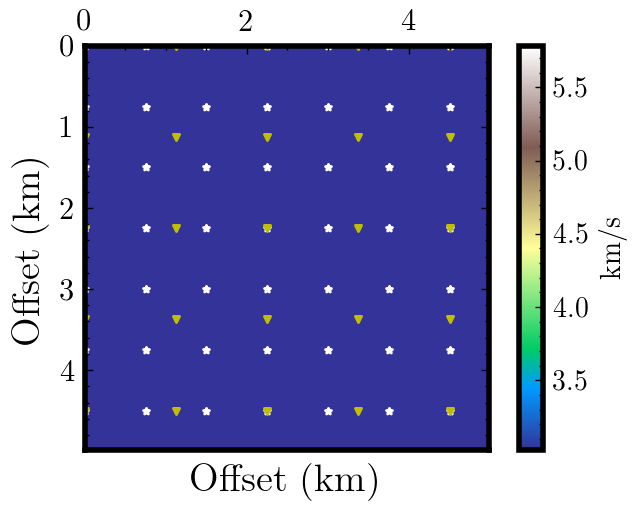

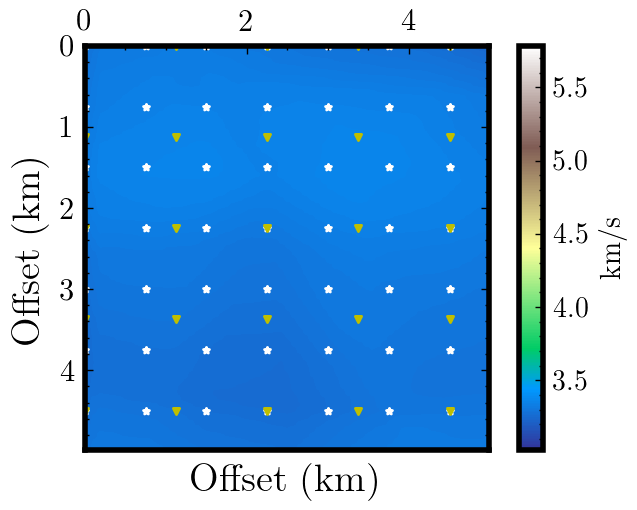

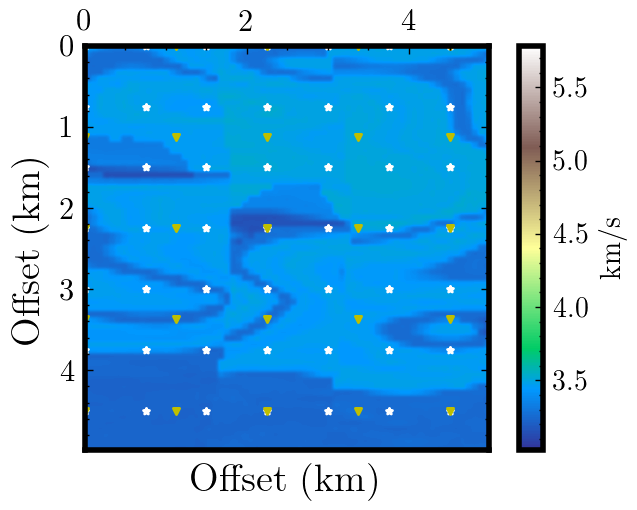

In [33]:
# XY plane
i=25
plot_depth(v_init.reshape(X.shape)[i,:,:,0], 'v_init_xy_z_'+str(round(z[i], 2))+'.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou],
             rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec])

# XY plane
plot_depth(v_pred.reshape(X.shape)[i,:,:,0], 'v_pred_xy_z_'+str(round(z[i], 2))+'.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou],
             rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec])

# XY plane
plot_depth(vel3d[i,:,:], 'v_true_xy_z_'+str(round(z[i], 2))+'.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,0].reshape(-1)[id_sou],sz=Y[:,:,:,0].reshape(-1)[id_sou],
             rx=X[:,:,:,0].reshape(-1)[id_rec],rz=Y[:,:,:,0].reshape(-1)[id_rec])

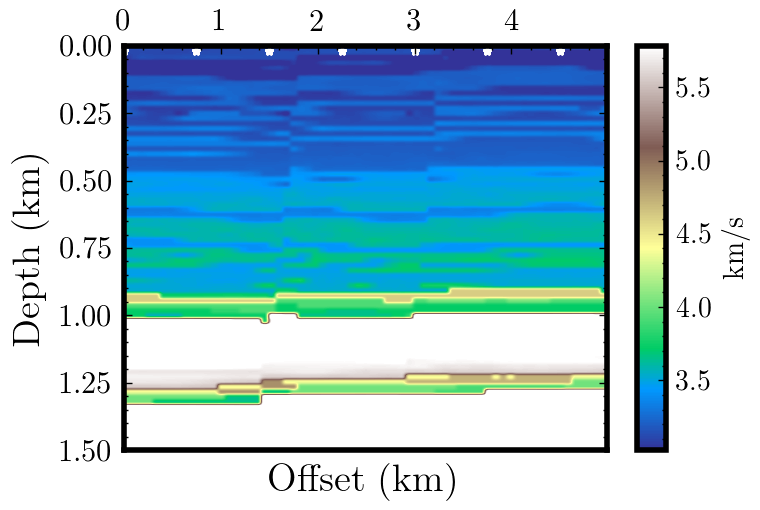

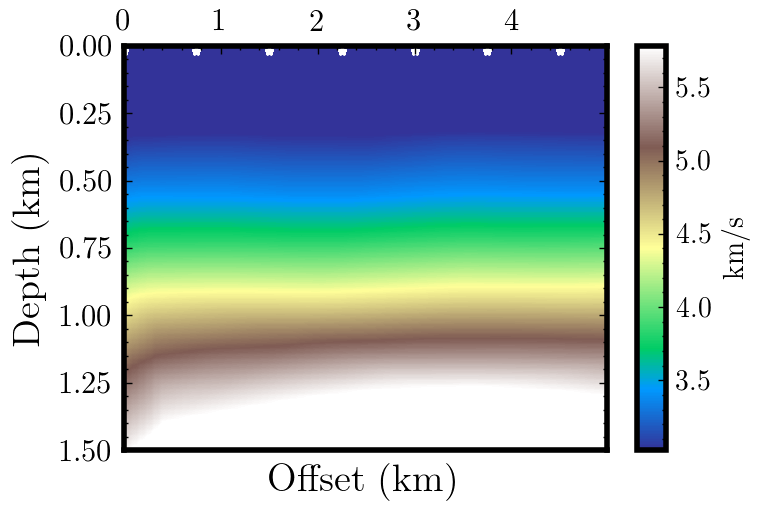

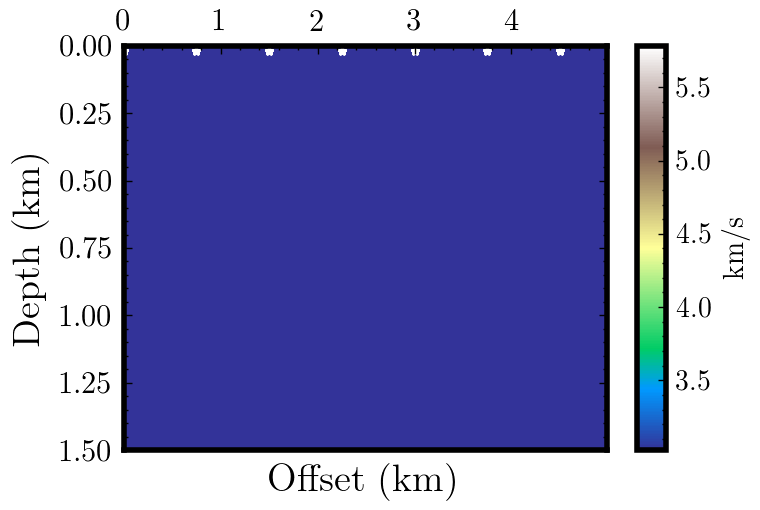

In [27]:
j=50

# ZX plane
plot_section(vel3d[:,j,:], 'v_true_zx_y_'+str(round(y[j], 2))+'.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

# ZX plane
i=0
plot_section(v_pred.reshape(X.shape)[:,j,:,i], 'v_pred_zx_y_'+str(round(y[j], 2))+'.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou])

# ZX plane
plot_section(v_init.reshape(X.shape)[:,j,:,0], 'v_init_zx_y_'+str(round(y[j], 2))+'.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

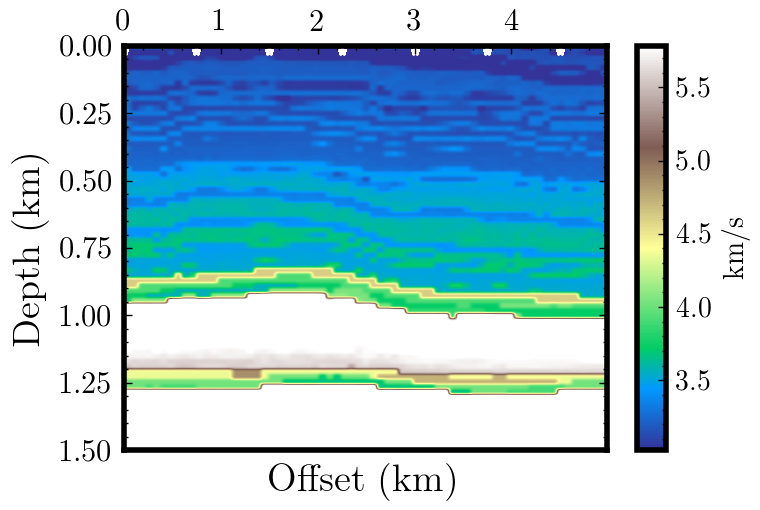

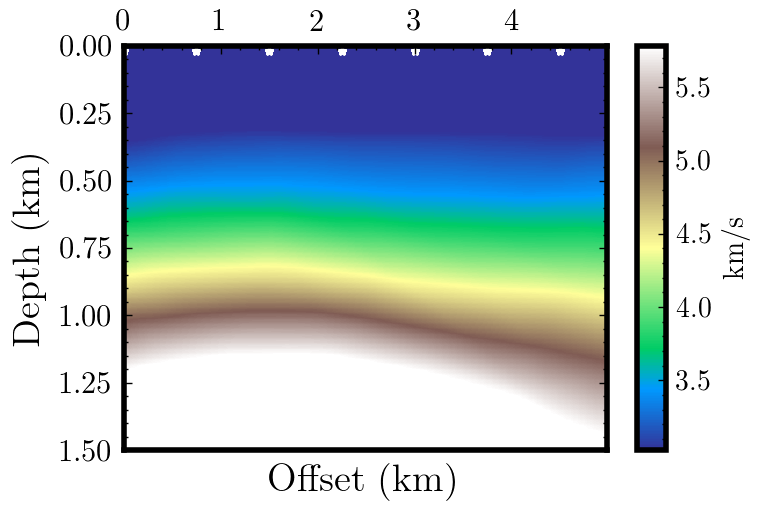

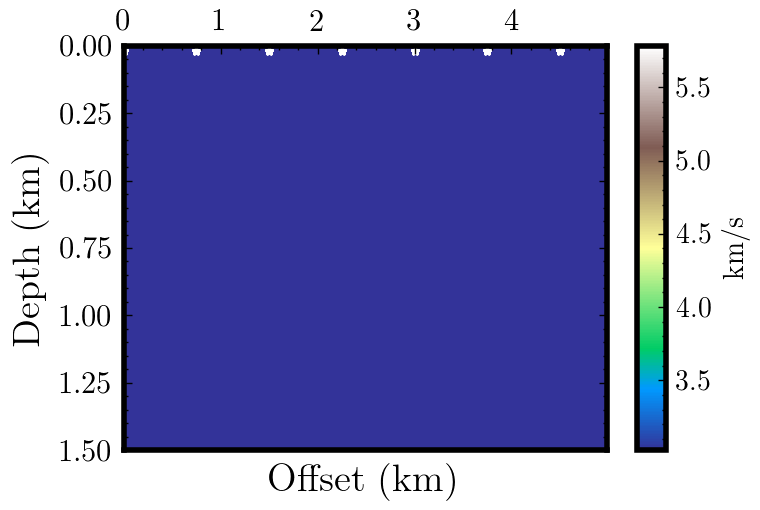

In [23]:
j=40

# ZY plane
plot_section(vel3d[:,:,j], 'v_true_zy_x_'+str(round(x[j], 2))+'.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

# ZY plane
i=0
plot_section(v_pred.reshape(X.shape)[:,:,j,i], 'v_pred_zy_x_'+str(round(x[j], 2))+'.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou])

# ZY plane
plot_section(v_init.reshape(X.shape)[:,:,j,0], 'v_init_zy_x_'+str(round(x[j], 2))+'.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='auto',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,0].reshape(-1)[id_sou],sz=Z[:,:,:,0].reshape(-1)[id_sou])

## Playground

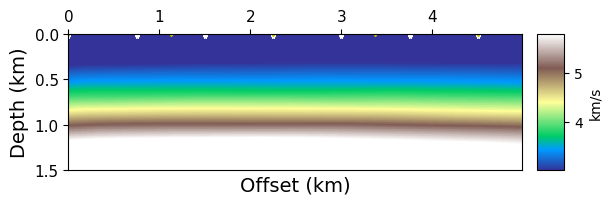

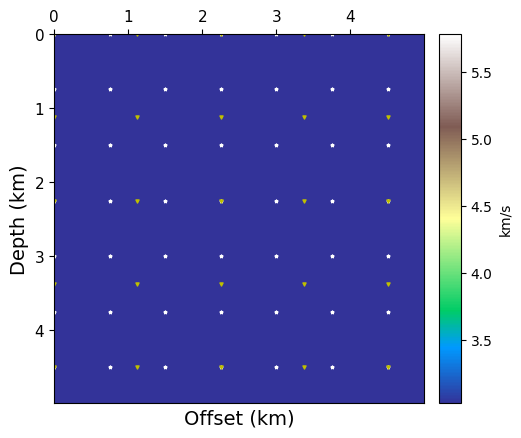

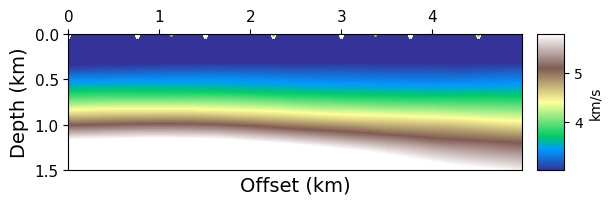

In [8]:
# To load
checkpoint = torch.load(wandb_dir+'/saved_model')
tau_model.load_state_dict(checkpoint['tau_model_state_dict'])
v_model.load_state_dict(checkpoint['v_model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

# Prediction
pde_loader, ic = create_dataloader3d([i.ravel() for i in input_wsrc], sx, sy, sz,
                                   shuffle=False, batch_size=2048, fast_loader=True, perm_id=ipermute)
v_pred = evaluate_velocity3d(v_model, pde_loader, X.size, batch_size=2048, device=device)

tau_pred = evaluate_tau3d(tau_model, pde_loader, X.size, batch_size=2048, device=device)

v_pred = v_pred.detach().cpu().numpy()
tau_pred = tau_pred.detach().cpu().numpy()

# ZX plane after
plot_section(v_pred.reshape(X.shape)[:,10,:,i], 'v_pred_zx.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

# XY plane
plot_section(v_pred.reshape(X.shape)[5,:,:,i], 'v_pred_xy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=xmin, zmax=xmax, 
             sx=X[:,:,:,i].reshape(-1)[id_sou],sz=Y[:,:,:,i].reshape(-1)[id_sou],rx=X[:,:,:,i].reshape(-1)[id_rec],rz=Y[:,:,:,i].reshape(-1)[id_rec])

# ZY plane
plot_section(v_pred.reshape(X.shape)[:,:,10,i], 'v_pred_zy.png', vmin=np.nanmin(velmodel)+0.1, 
             vmax=np.nanmax(velmodel)-0.5, save_dir=wandb_dir, aspect='equal',
             xmin=xmin, xmax=xmax, zmin=zmin, zmax=zmax, 
             sx=Y[:,:,:,i].reshape(-1)[id_sou],sz=Z[:,:,:,i].reshape(-1)[id_sou],rx=Y[:,:,:,i].reshape(-1)[id_rec],rz=Z[:,:,:,i].reshape(-1)[id_rec])

In [19]:
plt.style.use("~/science.mplstyle")

2.2500000000000004
1.5000000000000002


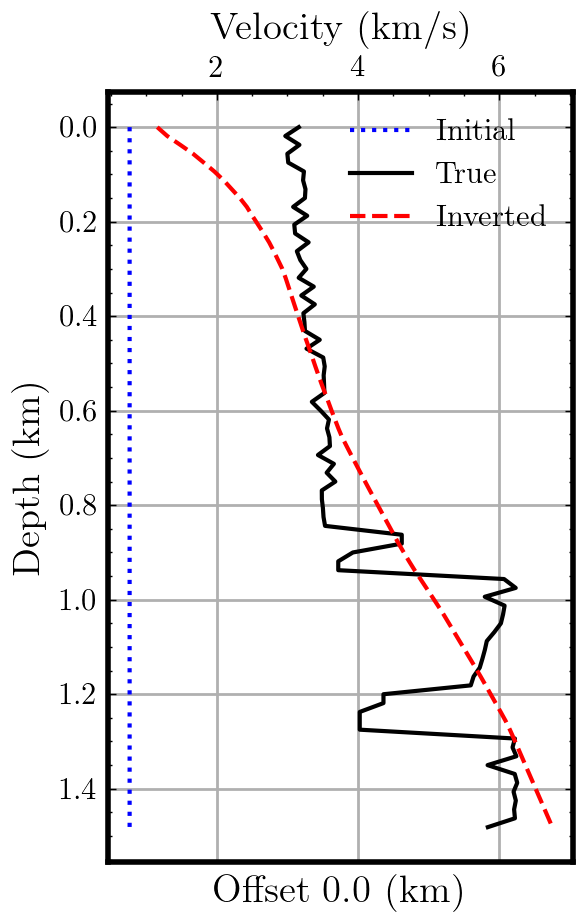

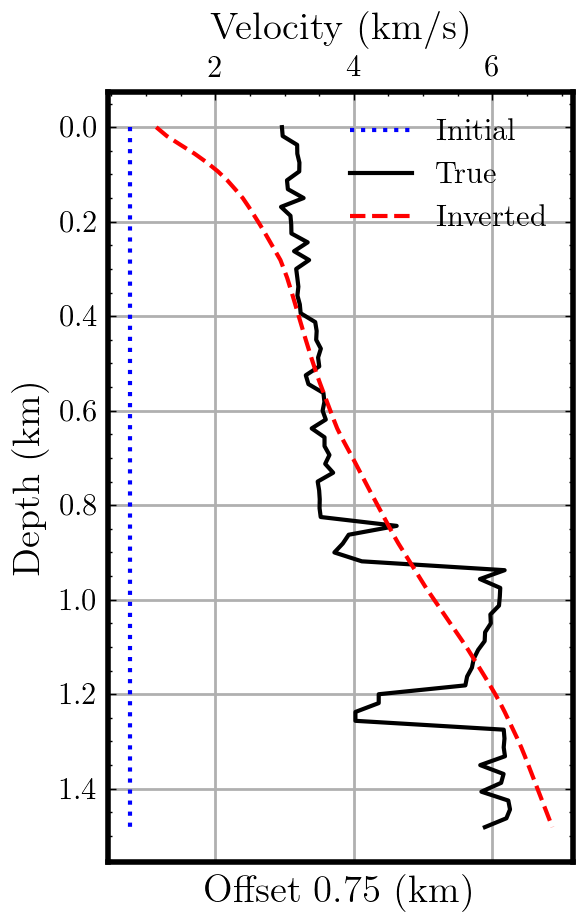

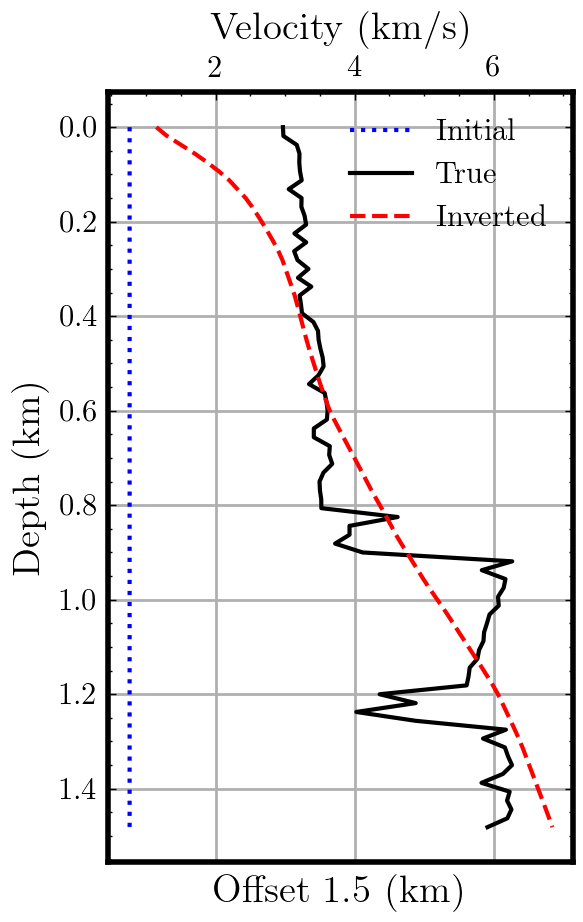

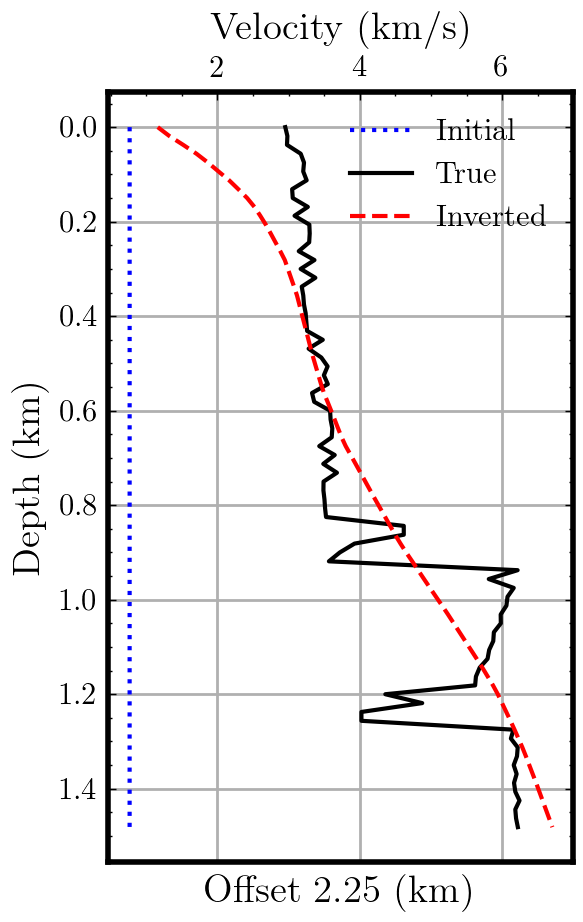

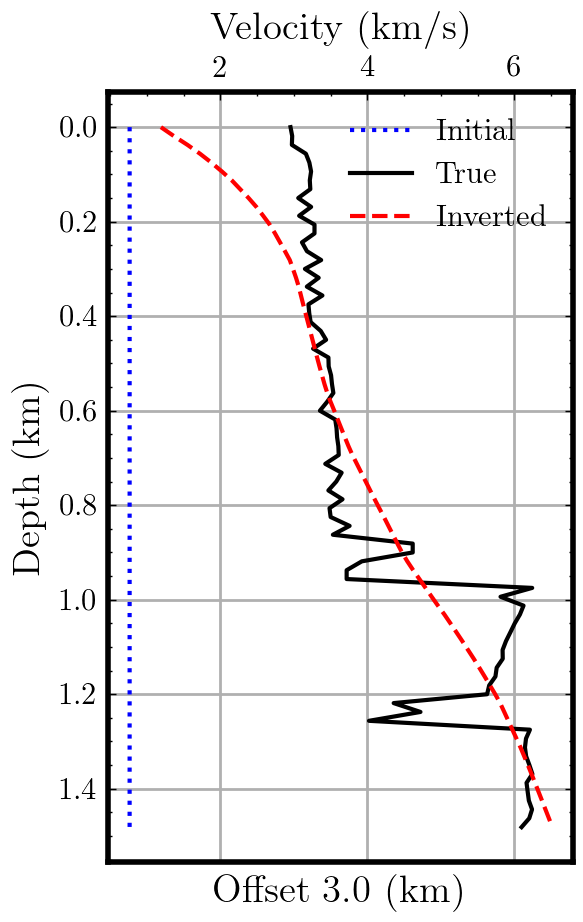

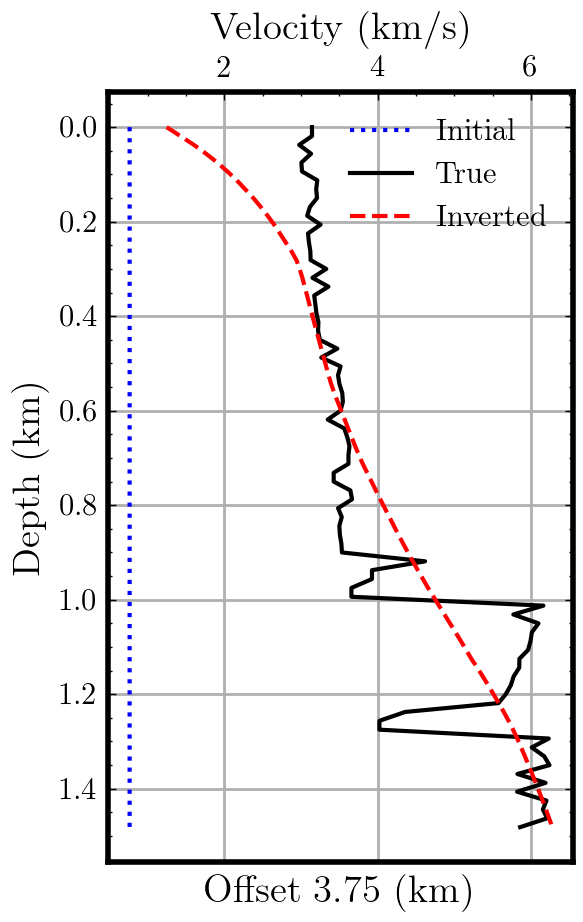

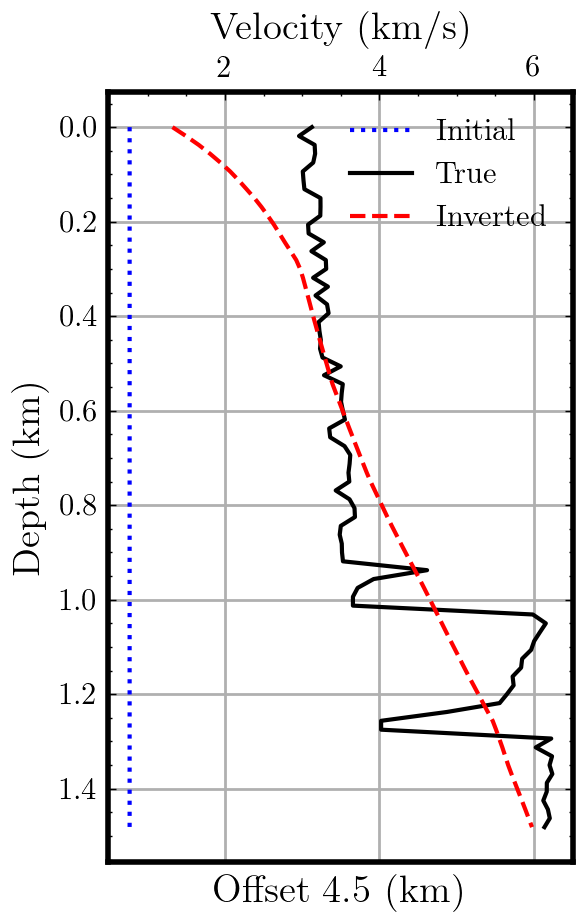

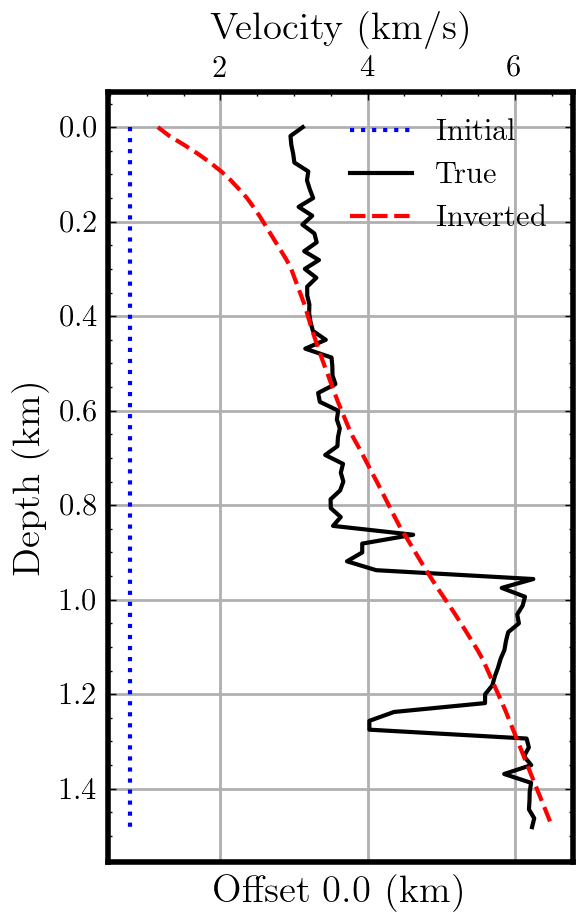

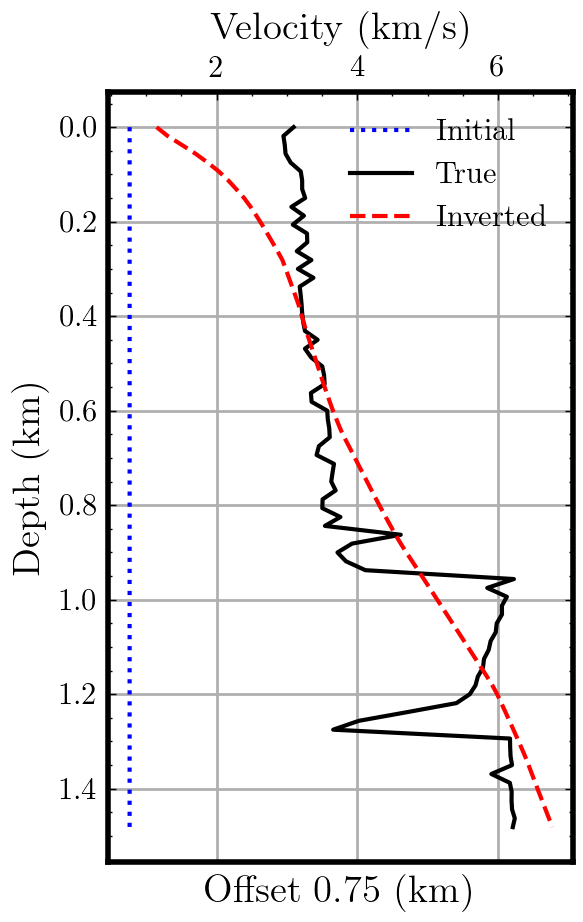

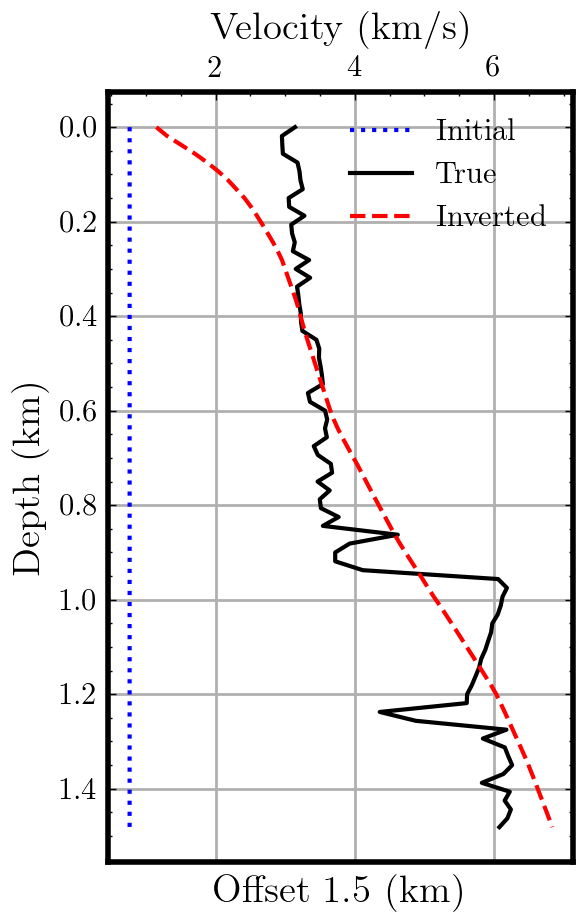

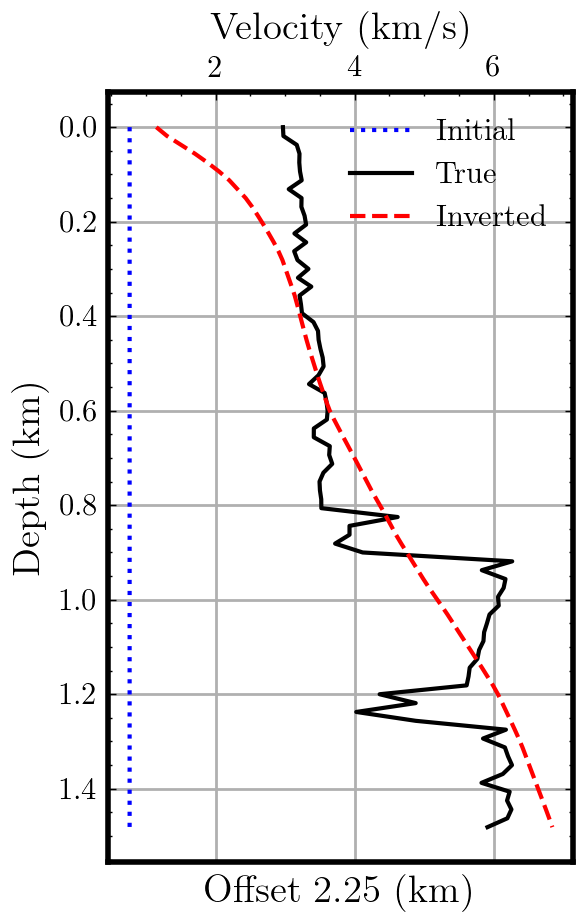

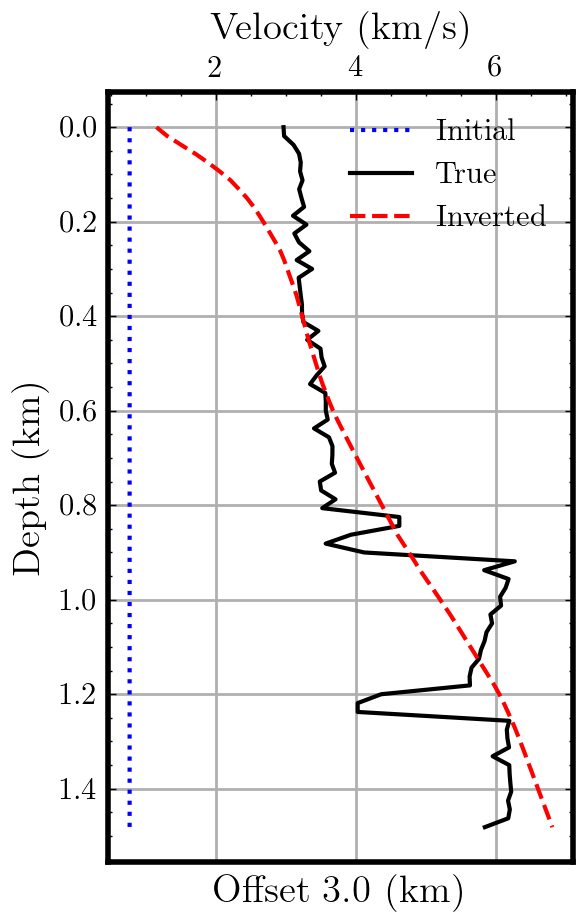

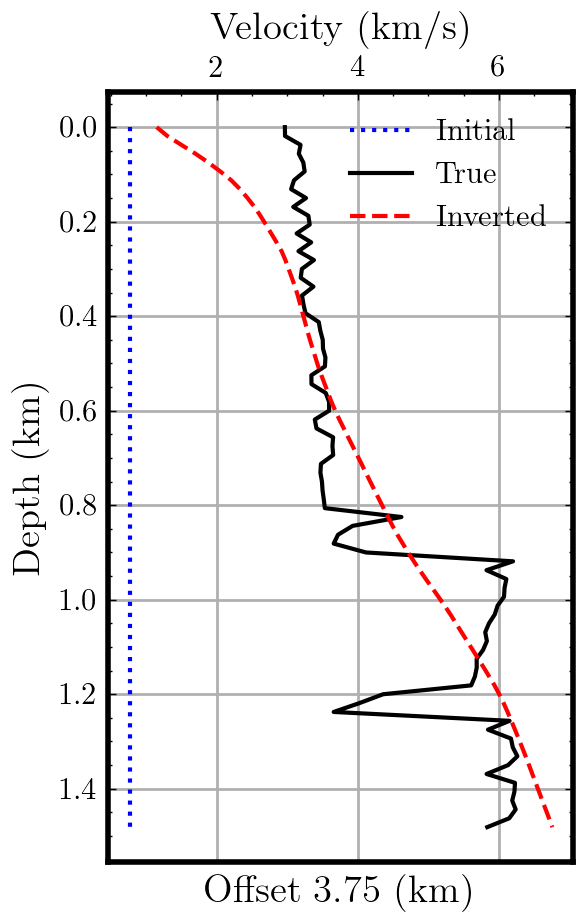

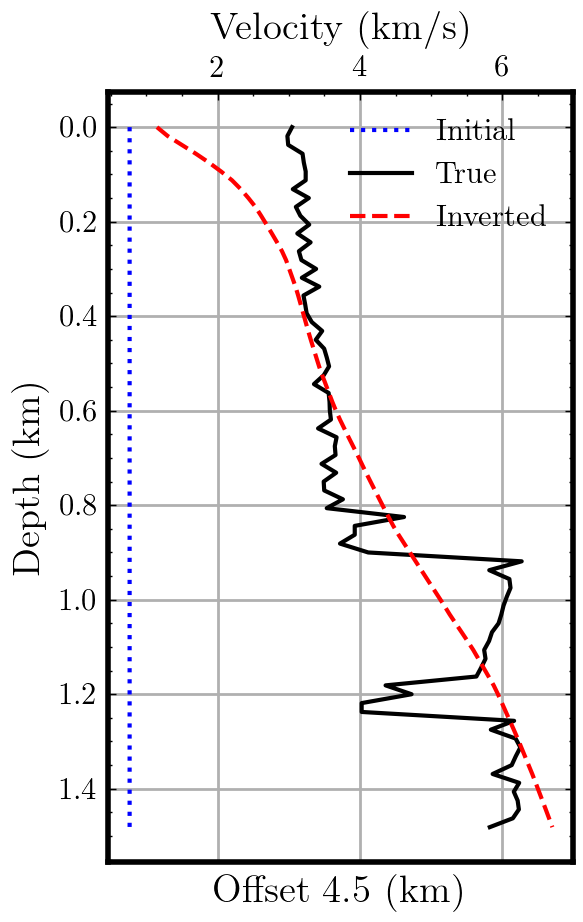

In [20]:
print(y[30])
for i in range(len(x)):
    if i%10==0:
        plot_trace(v_init[:,:,30,0], vel3d[:,:,30], v_pred.reshape(X.shape)[:,:,30,0], i, x, z, 
                   fig_name='trace_x_'+str(round(x[i], 2))+'.png', save_dir=wandb_dir)
        
print(x[20])
for i in range(len(y)):
    if i%10==0:
        plot_trace(v_init[:,20,:,0], vel3d[:,20,:], v_pred.reshape(X.shape)[:,20,:,0], i, x, z, 
                   fig_name='trace_y_'+str(round(y[i], 2))+'.png', save_dir=wandb_dir)

In [ ]:
import matplotlib

def plot_slice(x, y, z, data, xslice, yslice, zslice, ax=None, vmin=None, vmax=None, fig_name=None, save_dir='./'):
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    else:
        fig = plt.figure()

    data_z = data[zslice,:,:]
    data_x = data[:,:,xslice]
    data_y = data[:,yslice,:]
    
    norm = matplotlib.colors.Normalize(vmin=data.min(), vmax=data.max())
    cmap = plt.cm.get_cmap('terrain')#plt.cm.
    m = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    m.set_array([])
    # fcolors = m.to_rgba(data.reshape(-1,1))
    
    # Plot X slice
    xs, ys, zs = data.shape
    
    xplot = ax.plot_surface(np.atleast_2d(x[xslice]), y[:, np.newaxis], z[np.newaxis, :],
                            facecolors=m.to_rgba(data_x.T), cmap=cmap) #, vmin=1.5, vmax=8.85)
    # Plot Y slice
    yplot = ax.plot_surface(x[:, np.newaxis], np.atleast_2d(y[yslice]), z[np.newaxis, :],
                            facecolors=m.to_rgba(data_y.T), cmap=cmap) #, vmin=1.5, vmax=8.85)
    # Plot Z slice
    zplot = ax.plot_surface(x[:, np.newaxis], y[np.newaxis, :], np.atleast_2d(z[zslice]),
                            facecolors=m.to_rgba(data_z.T), cmap=cmap) #, vmin=1.5, vmax=8.85)
    # zplot.
    cbar = plt.colorbar(m, shrink=0.15, aspect=5, location='bottom')
    cbar.set_label('km/s')
    
    ax.invert_zaxis()
    ax.set_xlabel('X (km)')
    ax.set_ylabel('Y (km)')
    ax.set_zlabel('Z (km)')
    
    if fig_name is not None:
        plt.savefig(os.path.join(save_dir, fig_name), 
                    format='png', bbox_inches="tight")

# Computational model parameters
zmin = -0.1 if args.field_synthetic=='y' else 0; zmax = args.max_depth; deltaz = args.vertical_spacing;
ymin = 0.; ymax = args.max_offset; deltay = args.lateral_spacing;
xmin = 0.; xmax = args.max_offset; deltax = args.lateral_spacing;

if args.earth_scale=='y':
    earth_radi = 6371/args.scale_factor # Average in km
    xmin, xmax, deltax = earth_radi*xmin, earth_radi*xmax, earth_radi*deltax
    ymin, ymax, deltay = earth_radi*ymin, earth_radi*ymax, earth_radi*deltay
    zmin, zmax, deltaz = earth_radi*zmin, earth_radi*zmax, earth_radi*deltaz

# Creating grid, extending the velocity model, and prepare list of grid points for training (X_star)
z = np.arange(zmin,zmax+deltaz,deltaz)
nz = z.size

y = np.arange(ymin,ymax+deltay,deltay)
ny = y.size

x = np.arange(xmin,xmax+deltax,deltax)
nx = x.size

plot_slice(x, y, z, vel3d.reshape(X[:,:,:,0].shape), 0, y.size-1, z.size-1, fig_name='v_trueCube.png', save_dir=wandb_dir)
plot_slice(x, y, z, v_pred.reshape(X.shape)[:,:,:,0], 0, y.size-1, z.size-1, fig_name='v_predCube.png', save_dir=wandb_dir)
plot_slice(x, y, z, v_init.reshape(X.shape)[:,:,:,0], 0, y.size-1, z.size-1, fig_name='v_initCube.png', save_dir=wandb_dir)